In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy

<span style="font-family:Times New Roman; font-size:12pt;"> Recall the following definitions: </span>

$A = {\textbf{1}^T}{\Sigma}^{-1}\mu = \mu^{T}\Sigma^{-1}\textbf{1}$ <br/>
$B = μ^{T}\Sigma^{−1}\mu$ <br/>
$C = \textbf{1}^T\Sigma^{-1}\textbf{1}$ <br/>
$D = BC − A^{2}$ <br/>
$H = (\mu − \textbf{1}R_{f})^{T}\Sigma^{-1}(\mu − \textbf{1}R_{f})$

<span style="font-family:Times New Roman; font-size:12pt;"> Using these defintitions we can write: </span>

$g = \frac{1}{D}[B\Sigma^{-1}\textbf{1} - A{\Sigma}^{-1}\mu]$ <br/>
$h = \frac{1}{D}[C\Sigma^{-1}\mu - A\Sigma^{-1}\textbf{1}]$

In [6]:
Mu = np.array([1, 2, 3])
Mu

array([1, 2, 3])

In [20]:
Sigma = np.array([[1, -1, 0], [-1, 4, -1], [0, -1, 9]])
Sigma

array([[ 1, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  9]])

In [34]:
Rf = 1
Rf

1

In [7]:
g = np.array([1.529412, -0.058824, -0.470588])
g

array([ 1.529412, -0.058824, -0.470588])

In [9]:
h = np.array([-0.617647, 0.235294, 0.382353])
h

array([-0.617647,  0.235294,  0.382353])

<span style="font-family:Times New Roman; font-size:12pt;">  For the global minimum variance portfolio we have:

$\mu_{MV} = \frac{A}{C} = 1.420290$ <br/>
$\sigma_{MV} = (\frac{1}{C})^\frac{1}{2} = 0.613850$

Hence, 

$\mu_{MV} = g + h\mu_{MV} = \begin{bmatrix}0.652174\\0.275362\\0.072464\\\end{bmatrix} $
</span>

In [16]:
mu_s = np.linspace(1,3, 21)
mu_s

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [18]:
weights = [g + h*mu for mu in mu_s]
weights

[array([ 0.911765,  0.17647 , -0.088235]),
 array([ 0.8500003,  0.1999994, -0.0499997]),
 array([ 0.7882356,  0.2235288, -0.0117644]),
 array([0.7264709, 0.2470582, 0.0264709]),
 array([0.6647062, 0.2705876, 0.0647062]),
 array([0.6029415, 0.294117 , 0.1029415]),
 array([0.5411768, 0.3176464, 0.1411768]),
 array([0.4794121, 0.3411758, 0.1794121]),
 array([0.4176474, 0.3647052, 0.2176474]),
 array([0.3558827, 0.3882346, 0.2558827]),
 array([0.294118, 0.411764, 0.294118]),
 array([0.2323533, 0.4352934, 0.3323533]),
 array([0.1705886, 0.4588228, 0.3705886]),
 array([0.1088239, 0.4823522, 0.4088239]),
 array([0.0470592, 0.5058816, 0.4470592]),
 array([-0.0147055,  0.529411 ,  0.4852945]),
 array([-0.0764702,  0.5529404,  0.5235298]),
 array([-0.1382349,  0.5764698,  0.5617651]),
 array([-0.1999996,  0.5999992,  0.6000004]),
 array([-0.2617643,  0.6235286,  0.6382357]),
 array([-0.323529,  0.647058,  0.676471])]

In [27]:
stdevs = [((weight.transpose().dot(Sigma)).dot(weight))**0.5 for weight in weights]
stdevs

[0.8574929257142592,
 0.7648529270409181,
 0.6894157799544771,
 0.6373197553752277,
 0.6145299494955149,
 0.6242642728496482,
 0.6650961894193651,
 0.7318389408182242,
 0.818175876392014,
 0.9185986770161709,
 1.0289915108571108,
 1.1464779826539455,
 1.2690895300563474,
 1.3954758834107952,
 1.524698620173102,
 1.6560939160652997,
 1.7891831853092517,
 1.9236148568911453,
 2.0591260281987203,
 2.1955168224481136,
 2.3326329481069243]

<span style="font-family:Times New Roman; font-size:12pt;"> Recall:
    
$\bar{w} = \Sigma^{-1}(\mu - \textbf{1}R_{f})$ <br/>

Plugging in the data gives:

$\bar{w} = \begin{bmatrix}0.423077\\0.423077\\0.269231\\\end{bmatrix} $ <br/>

To get the tangency portfolio weights normalize $\bar{w}$ so that the weights sum to 1:

$w_T = \frac{\bar{w}}{\textbf{1}^{T}\bar{w}} = \begin{bmatrix}0.379310\\0.379310\\0.241379\\\end{bmatrix} $ <br/>

Then:

$\mu_{T} = w_{T}^{T}\mu = 1.862069 $ <br/>
$\sigma_{T} = (w_{T}^{T}\Sigma_{T})^\frac{1}{2} =  0.87914$


</span>

In [36]:
tangency_port = [0.87914, 1.862069]
Mu_tangency_port = tangency_port[1]
tangency_port

[0.87914, 1.862069]

In [32]:
zero_cov_port = [0.8574, 1]
zero_cov_port

[0.8574, 1]

<span style="font-family:Times New Roman; font-size:12pt;"> The Sharpe ratio of the tangency portfolio is given by:

$S_{T} = \frac{\mu_{T} - R_f}{\sigma_{T}} = \frac{1.862069 − 1}{0.8791} = 0.9805$

</span>

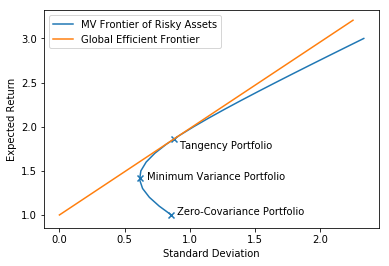

In [88]:
plt.plot(stdevs, mu_s, label='MV Frontier of Risky Assets')
plt.ylabel('Expected Return')
plt.xlabel('Standard Deviation')

std_lins = np.linspace(0, 2.25)
Global_EF = [Rf + ((1.862069 - 1)/0.87914)*stdev for stdev in std_lins]
plt.plot(std_lins, Global_EF, label='Global Efficient Frontier')
plt.scatter([0.87914, 0.613850, 0.8574], [1.862069, 1.420290, 1], marker='x')  
plt.text(0.92, 1.75, 'Tangency Portfolio')
plt.text(0.67, 1.4, 'Minimum Variance Portfolio')
plt.text(0.9, 1, 'Zero-Covariance Portfolio')

plt.legend()

In [ ]:
Sharpe_tangecy = 